# Data Clean

In this section, the dataset was cleaned by detecting the outliers and supplementing the default values.

Also, in order to complete the task of grading the rating of the works, the types of labels graded in the dataset were visualized. 

It was clear that the 14 label numbers varied too much. To solve the problem of severe imbalance of categories, we reclassified the four categories 'Teens', 'Adults', 'Older Kids', and 'Kids' according to the age of the target population of the 14 Ratings. 

The problem of category imbalance in the dataset is alleviated to some extent.

In [1]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('original/netflix_titles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.duplicated().sum() #check for duplicate value

0

In [5]:
df.isna().sum() #check for null value

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

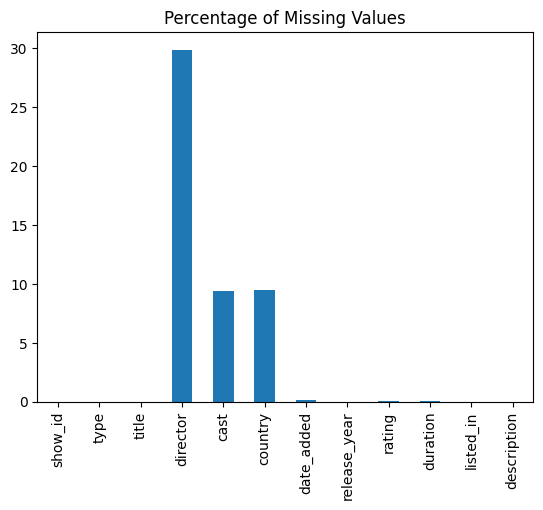

In [6]:
Perc_Missing_Values=(df.isna().sum()/df.shape[0])*100
Perc_Missing_Values
#Perc_Missing_Values[Perc_Missing_Values!=0]
Perc_Missing_Values.plot(kind="bar")
plt.title("Percentage of Missing Values")
plt.show()

"show_id": Not that important. So will be dropped.

"director": Percentage of missing values are more. So will be dropped.

"cast": there are too many diferent values. So will be dropped.

"country":Important variable hence we need to fix this.

"date_added": It is important so I need to fix it.

"rating": It is important so I need to fix it.

In [7]:
#Drop (cast,director,show id,description) columns:

df.drop("cast",axis=1,inplace=True)
df.drop("director",axis=1,inplace=True)
df.drop("show_id",axis=1,inplace=True)

In [8]:
#Fill the missing values:

df["country"]=df["country"].fillna(df["country"].mode()[0])
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])

In [9]:
#We will drop those Rows.They are only 10 Rows .Becoz it is difficult to add date of those Rows
df=df[df["date_added"].notna()]
df=df.dropna()

In [10]:
#Check the Cleaned dataset

df.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df["rating"].unique() #list of unique rating

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

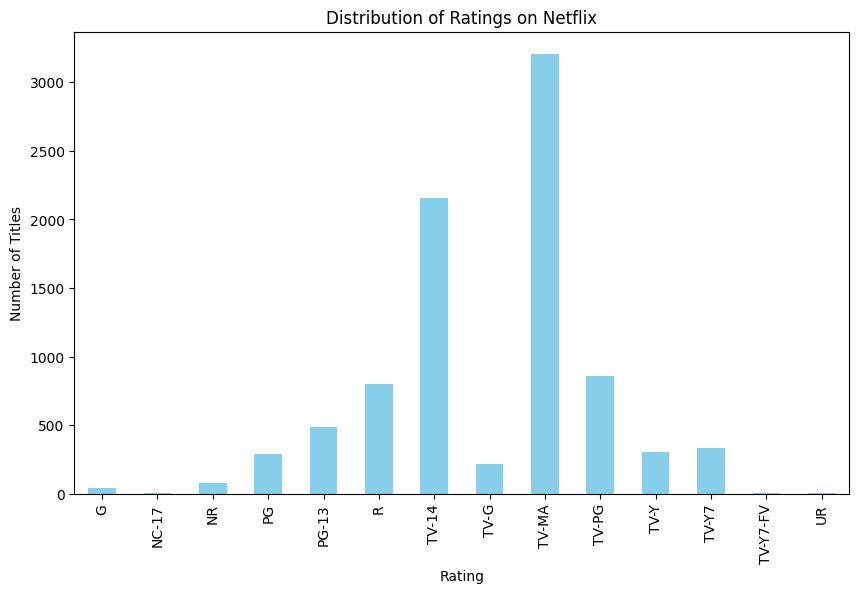

In [12]:
plt.figure(figsize=(10, 6))
df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

PG-13: Parental Guidance Suggested - Some material may be inappropriate for children under 13.

TV-MA: Mature Audience - Content is specifically designed to be viewed by adults and may be unsuitable for children under 17.

PG: Parental Guidance Suggested - Some material may not be suitable for children.

TV-14: Parents Strongly Cautioned - Content may be unsuitable for children under 14.

TV-PG: Parental Guidance Suggested - Some material may not be suitable for children under 7.

TV-Y: All Children - Content is suitable for all ages.

TV-Y7: Directed to Older Children - Content is suitable for children age 7 and above.

R: Restricted - Restricted to viewers over the age of 17 (under 17 requires accompanying parent or adult guardian).

TV-G: General Audience - All ages are admitted.

G: General Audience - All ages are admitted.

NC-17: No One 17 and Under Admitted - Content is not suitable for viewers under 17.

NR: Not Rated - Content has not been assigned a specific rating.

TV-Y7-FV: Directed to Older Children - Fantasy Violence - Similar to TV-Y7, but may contain more intense fantasy violence.

UR: Unrated - Similar to "Not Rated," indicating that no official rating has been assigned to the content.

In [13]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens', 
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}  #replacing ratings ages with some category (older kids-5 to 12 , adults-above 18years , teens-

In [14]:
df['target_ages'] = df['rating'].replace(ratings_ages)  #replace the ratings with above category
df['target_ages'].unique() 

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

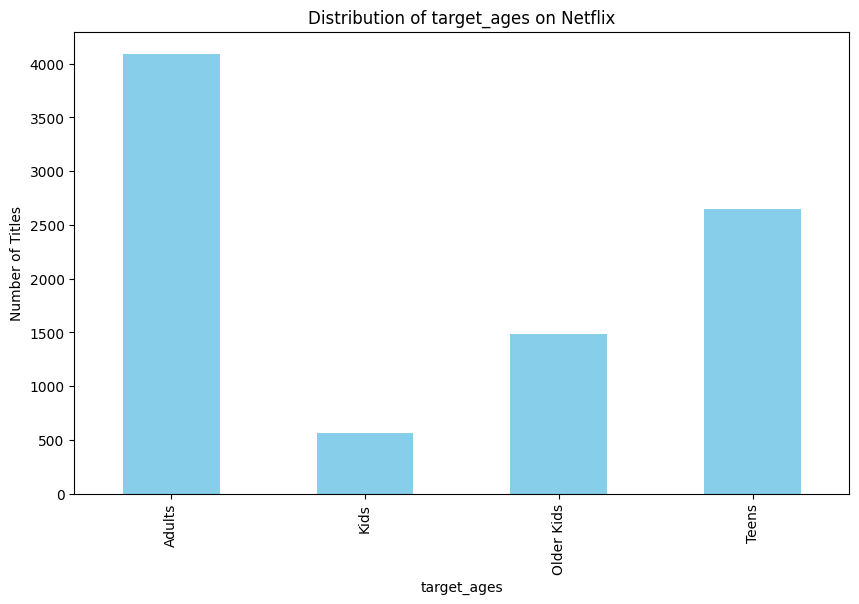

In [15]:
plt.figure(figsize=(10, 6))
df['target_ages'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of target_ages on Netflix')
plt.xlabel('target_ages')
plt.ylabel('Number of Titles')
plt.show()

In [16]:
df.rename(columns={'list_in': 'category'}, inplace=True)

In [17]:
output_path = "preprocessed/netflix_targeted_ages.csv"
df.to_csv(output_path, index=False) # save

# Text preprocessing for 'description'

In [18]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [19]:
def preprocess_text(text):
    
    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    return ' '.join(tokens)

In [20]:
file_path = 'preprocessed/netflix_targeted_ages.csv'
preprocessed_data = pd.read_csv(file_path)

preprocessed_data['description'] = preprocessed_data['description'].apply(preprocess_text)

output_path = "preprocessed/netflix_processed.csv"

preprocessed_data.to_csv(file_path, index=False) # save
print(preprocessed_data.head())

      type                  title        country          date_added  \
0    Movie   Dick Johnson Is Dead  United States  September 25, 2021   
1  TV Show          Blood & Water   South Africa  September 24, 2021   
2  TV Show              Ganglands  United States  September 24, 2021   
3  TV Show  Jailbirds New Orleans  United States  September 24, 2021   
4  TV Show           Kota Factory          India  September 24, 2021   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

       

# Dataset split

Split ratio: 7: 1.5: 1.5

In [21]:
from sklearn.model_selection import train_test_split

preprocessed_data = pd.read_csv(file_path)

In [22]:
shuffled_data = preprocessed_data.sample(frac=1, random_state=42)

train_data, temp_data = train_test_split(shuffled_data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [23]:
# Dataset split
from sklearn.model_selection import train_test_split

preprocessed_data = pd.read_csv(file_path)
shuffled_data = preprocessed_data.sample(frac=1, random_state=42)

train_data, temp_data = train_test_split(shuffled_data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)
train_path = "preprocessed/netflix_train.csv"
val_path = "preprocessed/netflix_val.csv"
test_path = "preprocessed/netflix_test.csv"

train_data.to_csv(train_path, index=False)
val_data.to_csv(val_path, index=False)
test_data.to_csv(test_path, index=False)

print(f"train sample：{len(train_data)}")
print(f"val sample：{len(val_data)}")
print(f"test sample：{len(test_data)}")

train sample：6155
val sample：1319
test sample：1320
